In [16]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("../data/movies_2010_2025.csv")
df = df.drop("Unnamed: 0", axis =1 )

## Helper ##

In [18]:
def count_miss_multiple(df, column_list):
    """
    Count number of 0 values for multiple columns
    and print results in format:
    column_name: count
    """
    data = []

    for col in column_list:
        if col not in df.columns:
            raise ValueError(f"{col} not found in DataFrame")
        
        miss_count = (df[col] == 0).sum()
        data.append([col, miss_count])

    result_df = pd.DataFrame(data, columns=["Column Name", "Zero Count"])
    print(result_df)

In [19]:
def count_empty_lists(df, column_list):
    data = []
    
    for col in column_list:
        miss_count = df[col].apply(lambda x: len(x) == 0).sum()
        data.append([col, miss_count])

    result_df = pd.DataFrame(data, columns=["Column Name", "Empty Count"])
    print(result_df)

In [20]:
def safe_parse_list(x):
    # Handle numpy arrays directly
    if isinstance(x, np.ndarray):
        return list(x)

    # Handle list directly
    if isinstance(x, list):
        return x

    # Handle missing values safely
    if isinstance(x, float) and pd.isna(x):
        return []

    # Handle strings
    if isinstance(x, str):
        x = x.strip()
        if x == "" or x == "[]":
            return []
        try:
            return ast.literal_eval(x)
        except:
            return []

    return []


## Based information of dataset ##

In [21]:
df.shape

(9290, 51)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9290 entries, 0 to 9289
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_id             9290 non-null   int64  
 1   title                9290 non-null   object 
 2   release_date         9289 non-null   object 
 3   runtime              9290 non-null   int64  
 4   original_language    9290 non-null   object 
 5   popularity           9290 non-null   float64
 6   vote_average         9290 non-null   float64
 7   vote_count           9290 non-null   int64  
 8   budget               9290 non-null   int64  
 9   revenue              9290 non-null   int64  
 10  status               9290 non-null   object 
 11  overview             9089 non-null   object 
 12  genres               9290 non-null   object 
 13  keywords             9290 non-null   object 
 14  director_id          9218 non-null   float64
 15  director_name        9218 non-null   o

In [23]:
df.head(5)

,movie_id,title,release_date,runtime,original_language,popularity,vote_average,vote_count,budget,revenue,...,actor4_popularity,actor4_department,actor5_id,actor5_name,actor5_character,actor5_gender,actor5_popularity,actor5_department,cast_pop_mean,cast_pop_max
0,27205,Inception,2010-07-15,148,en,32.8952,8.370,38655,160000000,839030630,...,9.6156,Acting,27578.0,Elliot Page,Ariadne,3.0,4.8289,Acting,7.38976,12.2774
1,38757,Tangled,2010-11-24,100,en,19.8760,7.610,12179,260000000,592461732,...,4.9563,Acting,22132.0,M.C. Gainey,Captain of the Guard (voice),2.0,2.1777,Acting,2.62706,4.9563
2,10138,Iron Man 2,2010-04-28,124,en,13.7900,6.850,22057,200000000,623933331,...,17.8153,Acting,6807.0,Sam Rockwell,Justin Hammer,2.0,4.4974,Acting,8.10100,17.8153
3,20352,Despicable Me,2010-07-08,95,en,18.4625,7.300,15829,69000000,543284256,...,0.7743,Acting,122851.0,Elsie Fisher,Agnes (voice),1.0,2.4183,Acting,3.36062,5.8392
4,12444,Harry Potter and the Deathly Hallows: Part 1,2010-11-17,146,en,13.8146,7.736,20083,250000000,954305868,...,3.1401,Acting,1283.0,Helena Bonham Carter,Bellatrix Lestrange,1.0,4.5939,Acting,5.72064,9.4552


In [24]:
num_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumeric summary stats:\n", df[num_cols].describe())


Numeric summary stats:
            movie_id      runtime   popularity  vote_average    vote_count  \
count  9.290000e+03  9290.000000  9290.000000   9290.000000   9290.000000   
mean   6.011193e+05    81.390635     5.788687      4.975927    979.719806   
std    3.918819e+05    44.067500     7.689172      2.671587   2775.948002   
min    1.890000e+02     0.000000     2.414700      0.000000      0.000000   
25%    2.948902e+05    67.000000     3.885000      4.000000      1.000000   
50%    5.299775e+05    92.000000     4.501300      5.964500     18.000000   
75%    8.838688e+05   107.000000     5.628275      6.800000    443.000000   
max    1.601195e+06   950.000000   378.004500     10.000000  38832.000000   

             budget       revenue   director_id  director_gender  \
count  9.290000e+03  9.290000e+03  9.218000e+03      9218.000000   
mean   1.214645e+07  3.659579e+07  1.135272e+06         1.388045   
std    3.662609e+07  1.446736e+08  1.133630e+06         0.857983   
min    0.

## Missing value ##

In [25]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_report = pd.DataFrame({"missing_count": missing, "missing_pct": missing_pct})
print("\nMissing values (top 15):\n", missing_report.head(31))


Missing values (top 15):
                      missing_count  missing_pct
actor5_character              2074        22.33
actor4_character              1709        18.40
actor5_department             1477        15.90
actor5_gender                 1477        15.90
actor5_name                   1477        15.90
actor5_id                     1477        15.90
actor3_character              1407        15.15
actor2_character              1107        11.92
actor4_department             1032        11.11
actor4_gender                 1032        11.11
actor4_id                     1032        11.11
actor4_name                   1032        11.11
actor1_character               918         9.88
actor3_name                    674         7.26
actor3_id                      674         7.26
actor3_department              674         7.26
actor3_gender                  674         7.26
actor2_name                    383         4.12
actor2_gender                  383         4.12
actor2_depart

In [26]:
# List of actor popularity columns
actor_pop_cols = [col for col in df.columns if "actor" in col and "popularity" in col]

# Count zeros for each column
for col in actor_pop_cols:
    zero_count = (df[col] == 0).sum()
    actor_number = col.split("_")[0]  # actor1, actor2, etc.
    print(f"Missing_{actor_number}: {zero_count}")

Missing_actor1: 225
Missing_actor2: 384
Missing_actor3: 681
Missing_actor4: 1036
Missing_actor5: 1479


In [27]:
zero_list = ["runtime","vote_average","vote_count","budget",
             "revenue","cast_pop_mean","cast_pop_max",
             "director_gender",
             "actor1_gender","actor2_gender","actor3_gender","actor4_gender",
            "actor5_gender"]
empty_list = ["genres","keywords"]

In [28]:
count_miss_multiple(df,zero_list)

        Column Name  Zero Count
0           runtime         457
1      vote_average        1642
2        vote_count        1640
3            budget        6527
4           revenue        6686
5     cast_pop_mean         222
6      cast_pop_max         222
7   director_gender        2285
8     actor1_gender        1024
9     actor2_gender        1208
10    actor3_gender        1325
11    actor4_gender        1414
12    actor5_gender        1347


In [29]:
df["keywords"] = df["keywords"].apply(ast.literal_eval)
df["genres"] = df["genres"].apply(ast.literal_eval)

In [30]:
count_empty_lists(df,empty_list)

  Column Name  Empty Count
0      genres          489
1    keywords         3238


In [31]:
df_budget_nonzero = df[df["budget"] != 0]
df_revenue_nonzero = df[df["revenue"] != 0]
df_both_nonzero = df[(df["budget"] != 0) & (df["revenue"] != 0)]
count_zero_both = ((df["budget"] == 0) & (df["revenue"] == 0)).sum()
print("Rows where both budget and revenue are 0:", count_zero_both)

Rows where both budget and revenue are 0: 5974


## Distribution ##

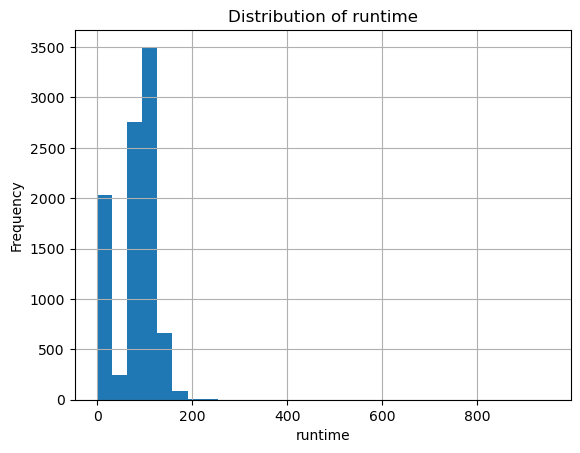

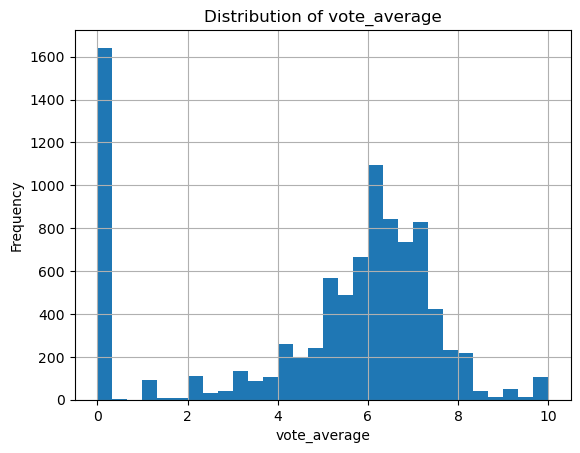

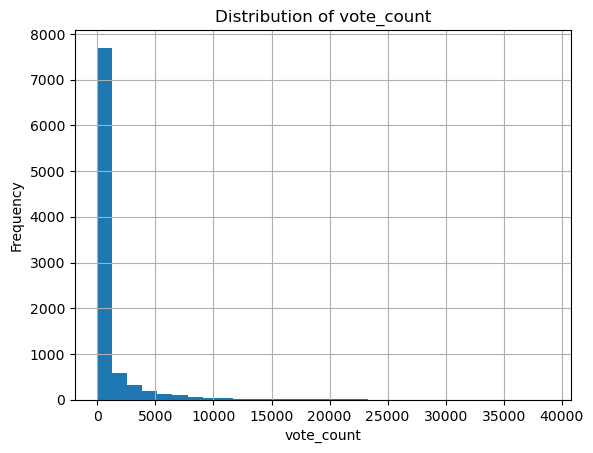

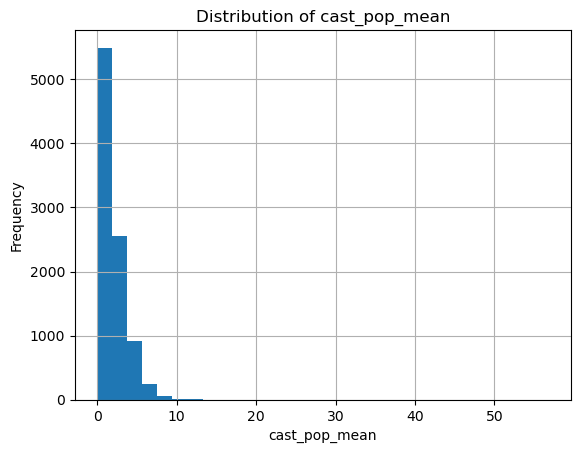

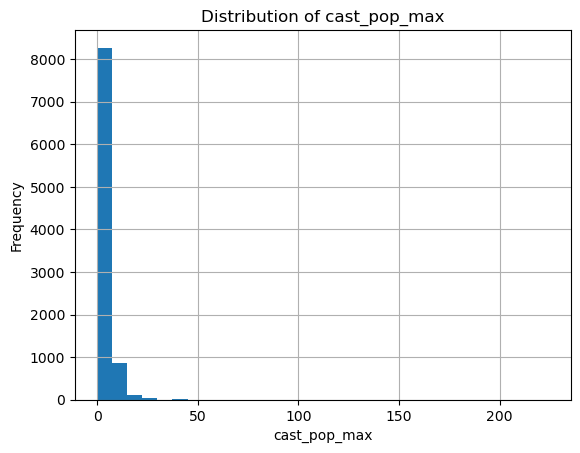

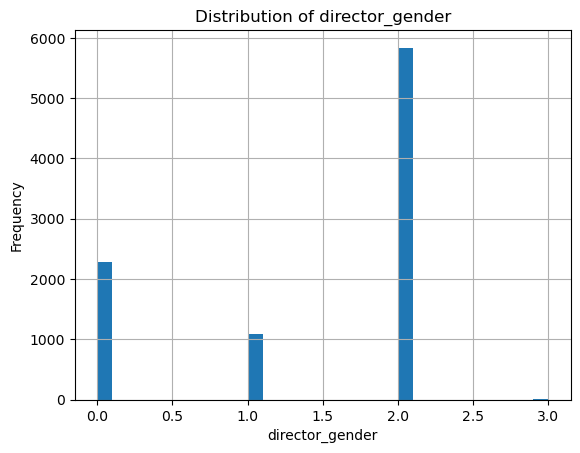

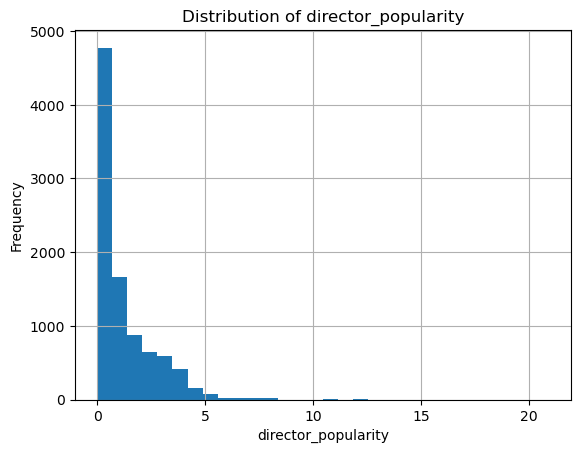

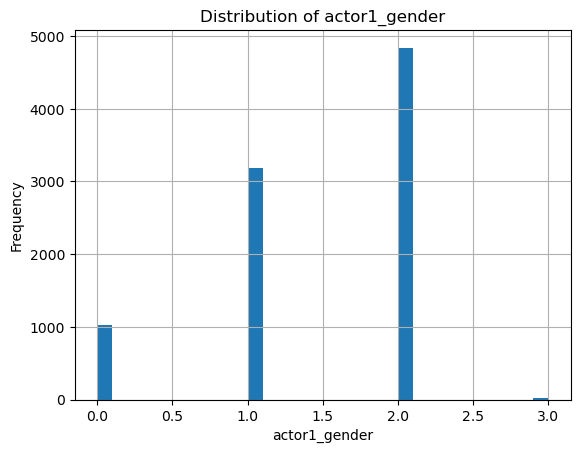

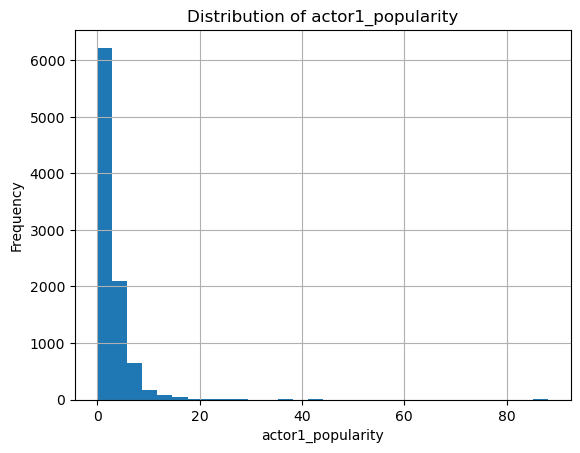

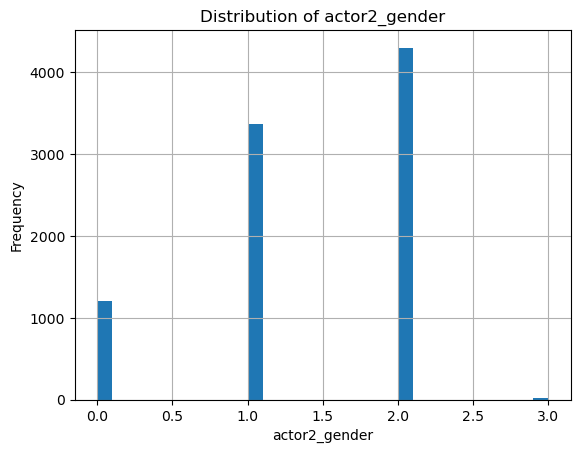

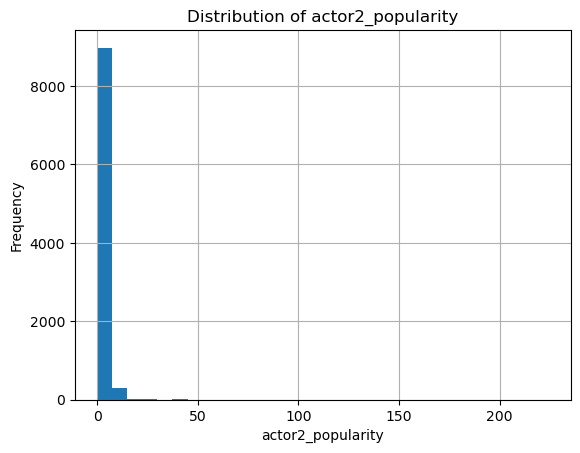

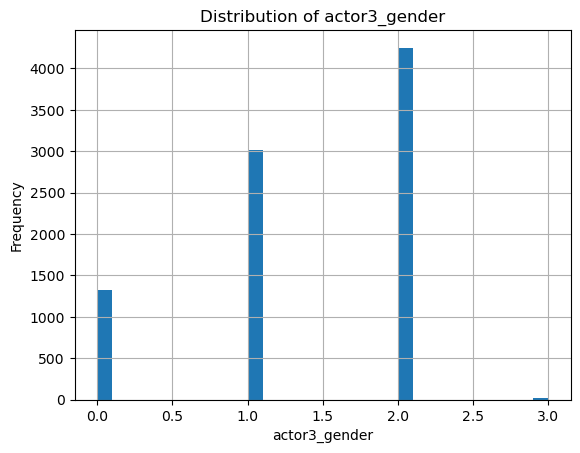

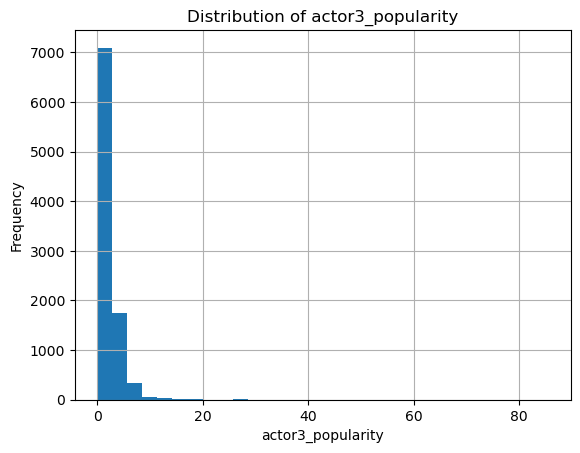

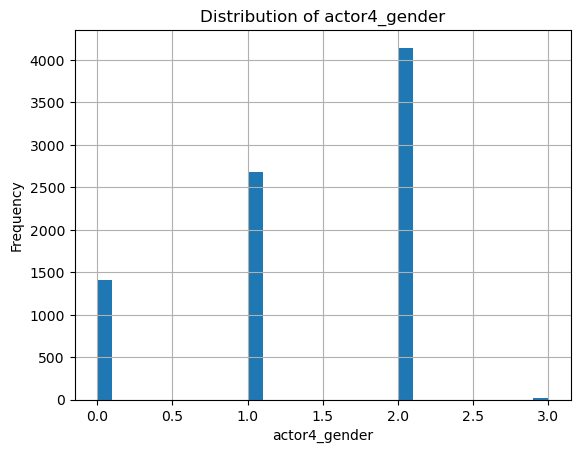

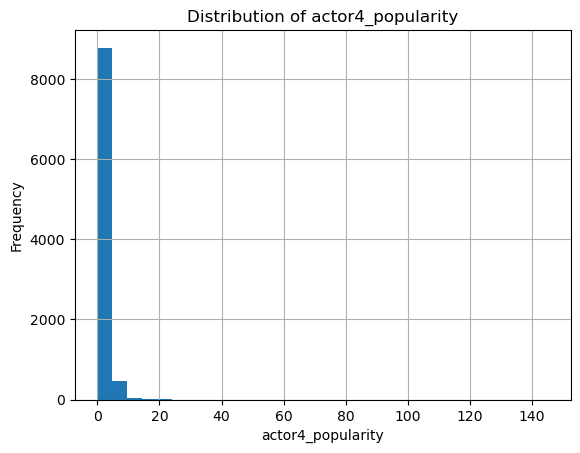

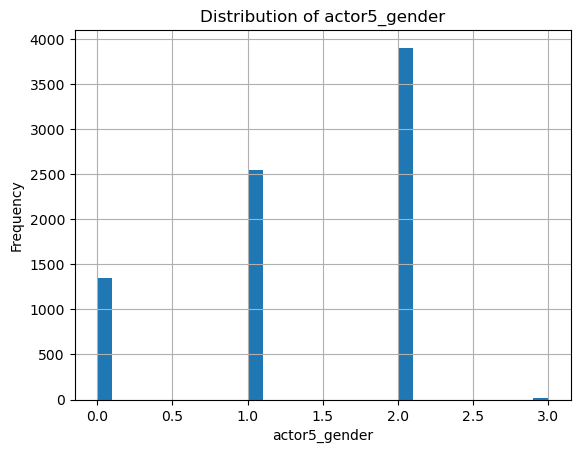

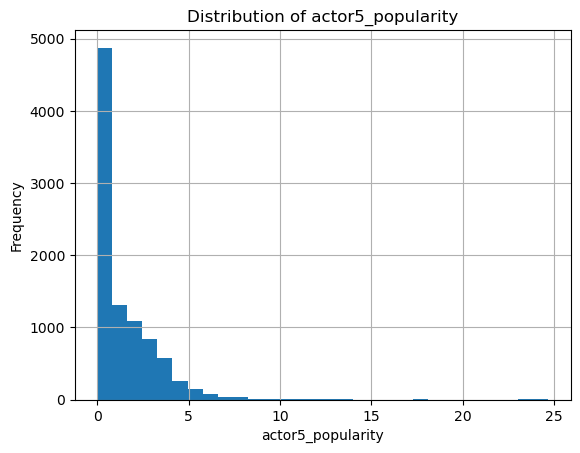

In [32]:
cols1 = ["runtime","vote_average","vote_count","cast_pop_mean","cast_pop_max",
             "director_gender","director_popularity","actor1_gender","actor1_popularity",
              "actor2_gender","actor2_popularity","actor3_gender","actor3_popularity",
              "actor4_gender","actor4_popularity","actor5_gender","actor5_popularity"]
hist_cols = [c for c in cols1 if c in df.columns]

for col in hist_cols:
    plt.figure()
    df[col].dropna().hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

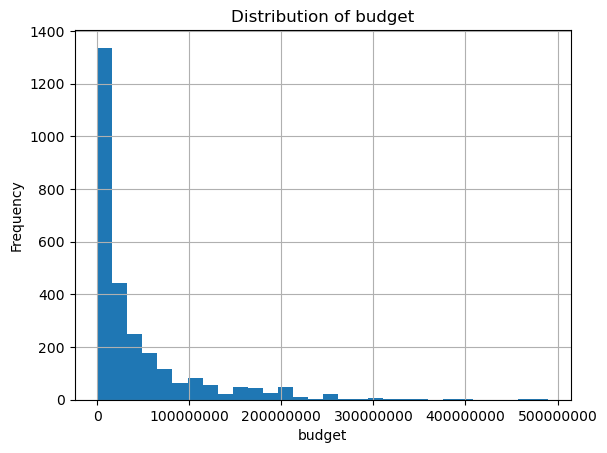

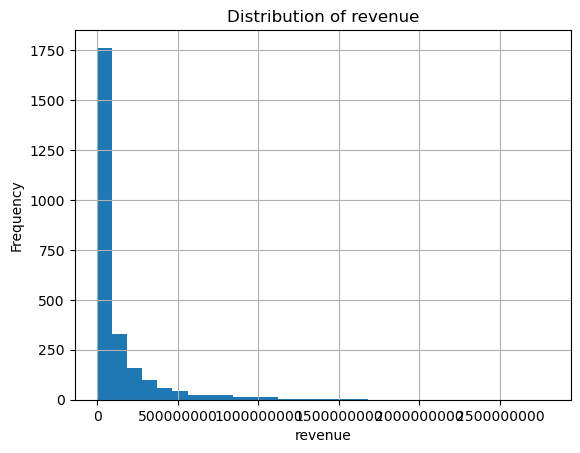

In [33]:
plt.figure()
df_budget_nonzero["budget"].dropna().hist(bins=30)
plt.gca().ticklabel_format(style='plain', axis='x')  # remove scientific notation
plt.title("Distribution of budget")
plt.xlabel("budget")
plt.ylabel("Frequency")
plt.show()

plt.figure()
df_revenue_nonzero["revenue"].dropna().hist(bins=30)
plt.gca().ticklabel_format(style='plain', axis='x')  # remove scientific notation
plt.title("Distribution of revenue")
plt.xlabel("revenue")
plt.ylabel("Frequency")
plt.show()

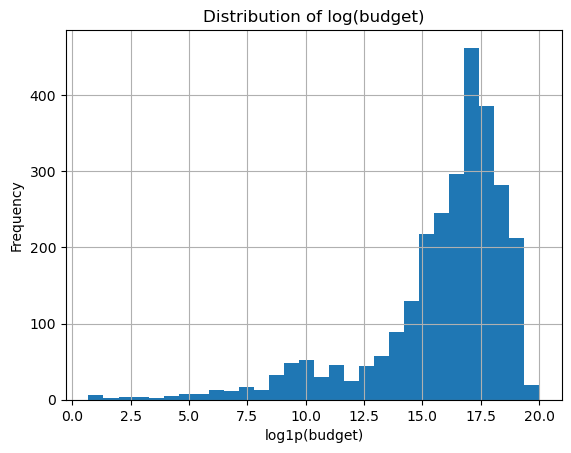

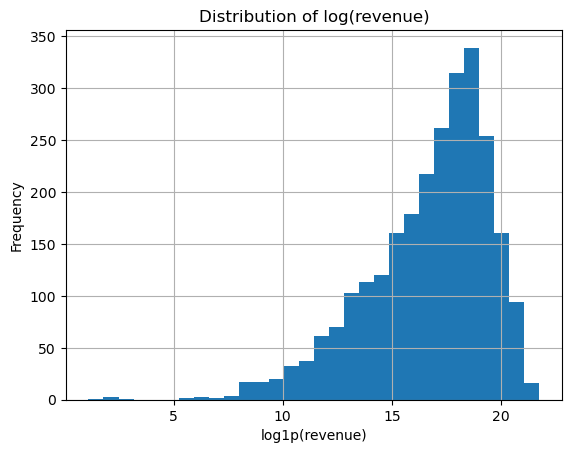

In [34]:
plt.figure()
        # use log1p to handle zeros
np.log1p(df_budget_nonzero["budget"].fillna(0)).hist(bins=30)
plt.title("Distribution of log(budget)")
plt.xlabel("log1p(budget)")
plt.ylabel("Frequency")
plt.show()

plt.figure()
        # use log1p to handle zeros
np.log1p(df_revenue_nonzero["revenue"].fillna(0)).hist(bins=30)
plt.title("Distribution of log(revenue)")
plt.xlabel("log1p(revenue)")
plt.ylabel("Frequency")
plt.show()

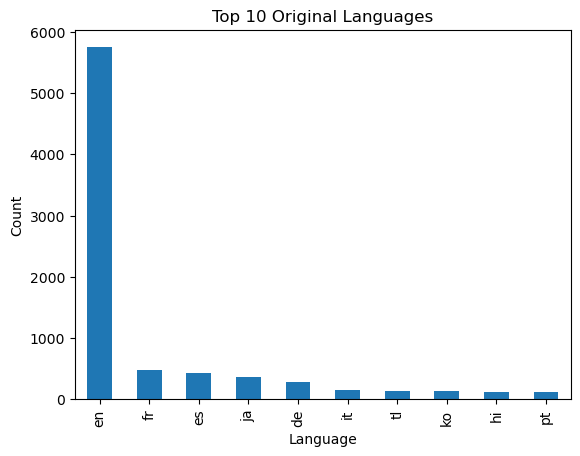

In [35]:
if "original_language" in df.columns:
    plt.figure()
    df["original_language"].value_counts().head(10).plot(kind="bar")
    plt.title("Top 10 Original Languages")
    plt.xlabel("Language")
    plt.ylabel("Count")
    plt.show()


Top genres:
 genres
Drama              4221
Comedy             2345
Thriller           1887
Action             1454
Horror             1302
Romance            1004
Adventure           836
Science Fiction     792
Crime               786
Fantasy             654
Family              577
Animation           569
Documentary         528
Mystery             524
History             300
Name: count, dtype: int64


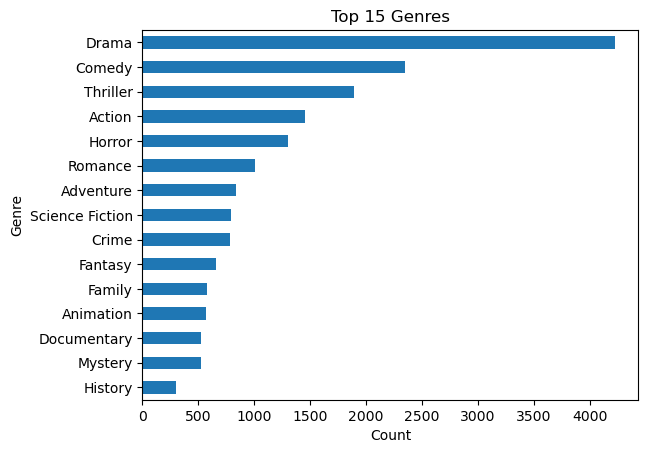

In [36]:
if "genres" in df.columns:

    genres_series = df["genres"].apply(safe_parse_list)
    exploded_genres = genres_series.explode().dropna()

    top_genres = exploded_genres.value_counts().head(15)

    print("\nTop genres:\n", top_genres)

    if not top_genres.empty:
        plt.figure()
        top_genres.sort_values().plot(kind="barh")
        plt.title("Top 15 Genres")
        plt.xlabel("Count")
        plt.ylabel("Genre")
        plt.show()
    else:
        print("No genres to plot.")


## Outlier ##

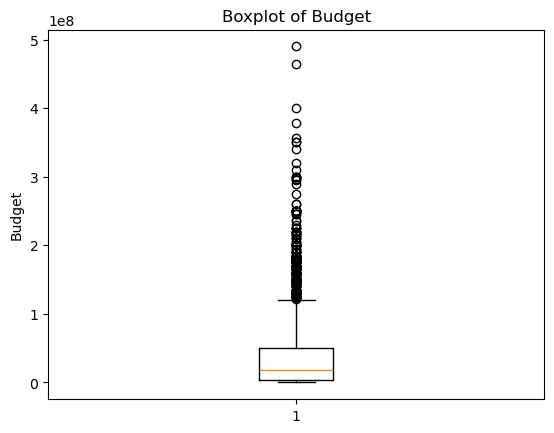

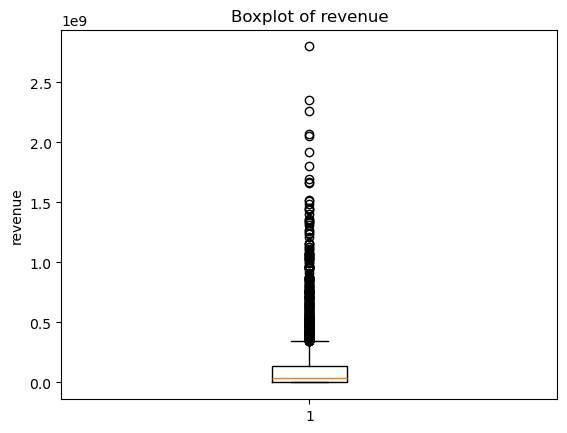

In [37]:
plt.figure()
plt.boxplot(df_budget_nonzero["budget"].dropna())
plt.title("Boxplot of Budget")
plt.ylabel("Budget")
plt.show()

plt.figure()
plt.boxplot(df_revenue_nonzero["revenue"].dropna())
plt.title("Boxplot of revenue")
plt.ylabel("revenue")
plt.show()

In [38]:
cols = ["runtime","vote_average","vote_count","cast_pop_mean","cast_pop_max",
             "director_popularity","actor1_popularity",
              "actor2_popularity","actor3_popularity",
            "actor4_popularity","actor5_popularity"]

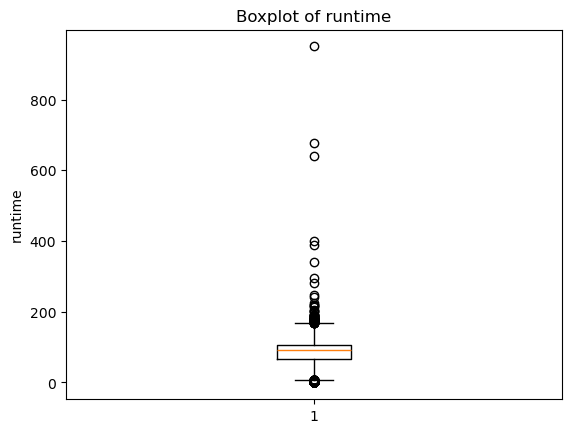

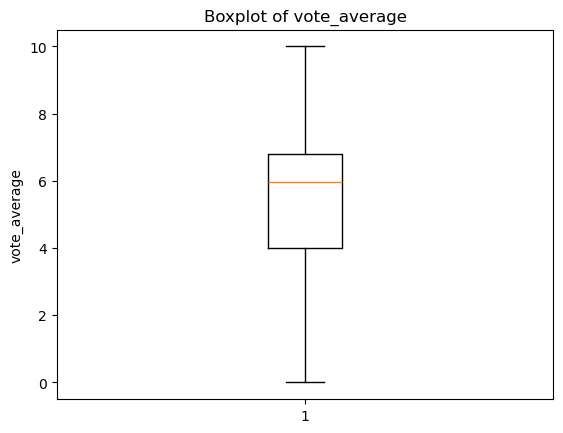

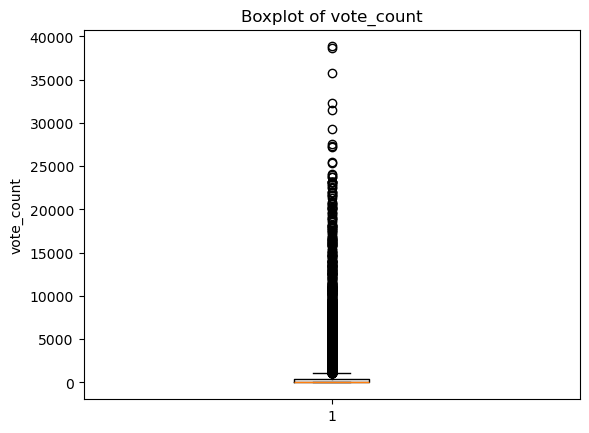

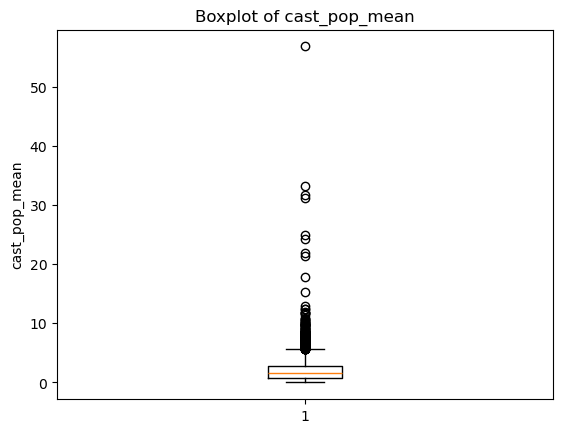

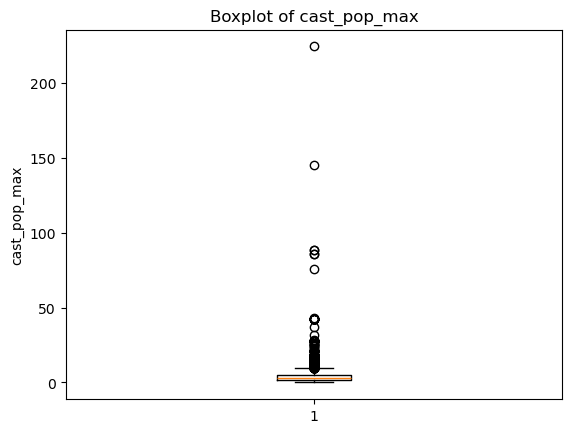

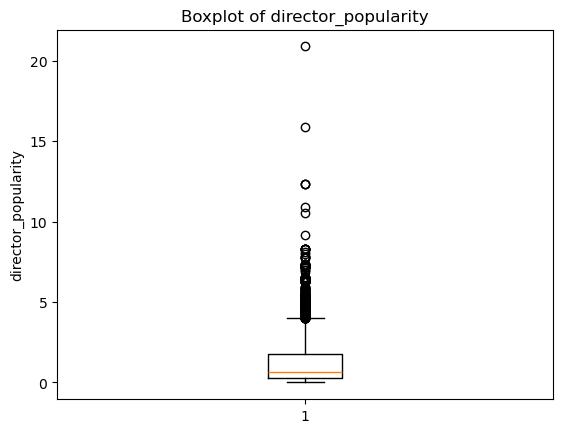

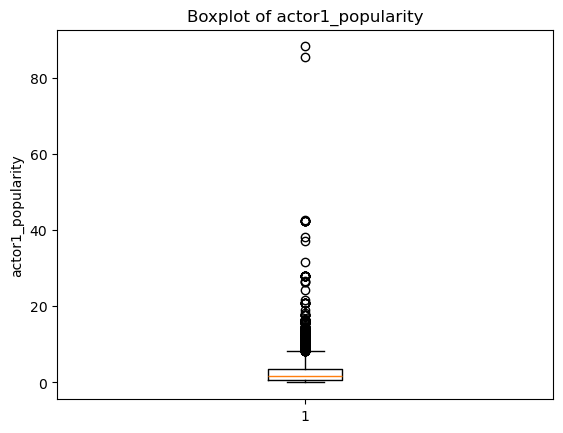

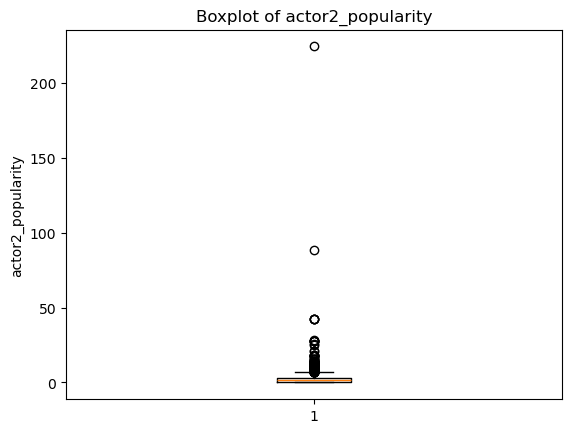

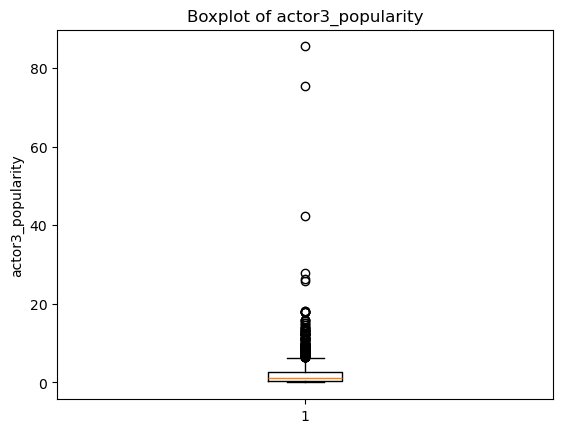

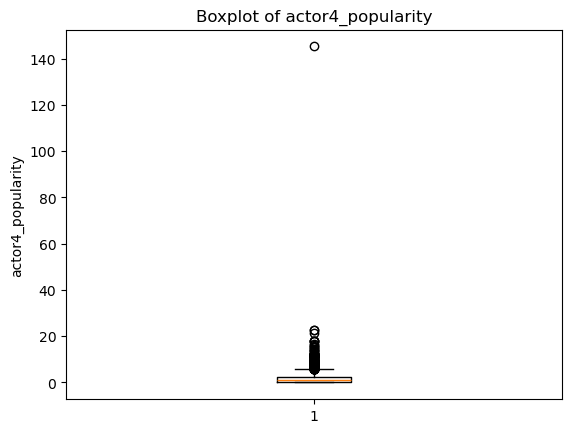

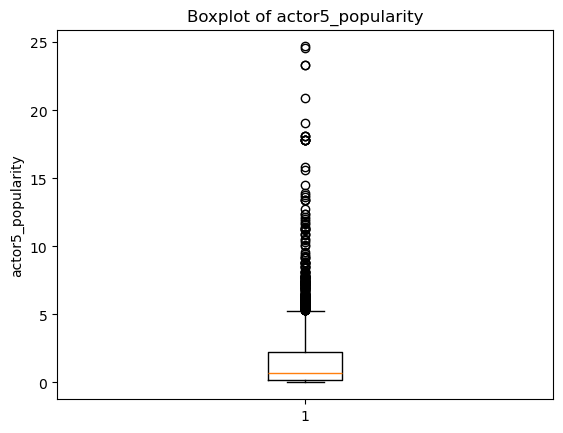

In [39]:
for col in cols:
    if col in df.columns:
        plt.figure()
        plt.boxplot(df[col].dropna())
        plt.title(f"Boxplot of {col}")
        plt.ylabel(col)
        plt.show()

## Correlation ##

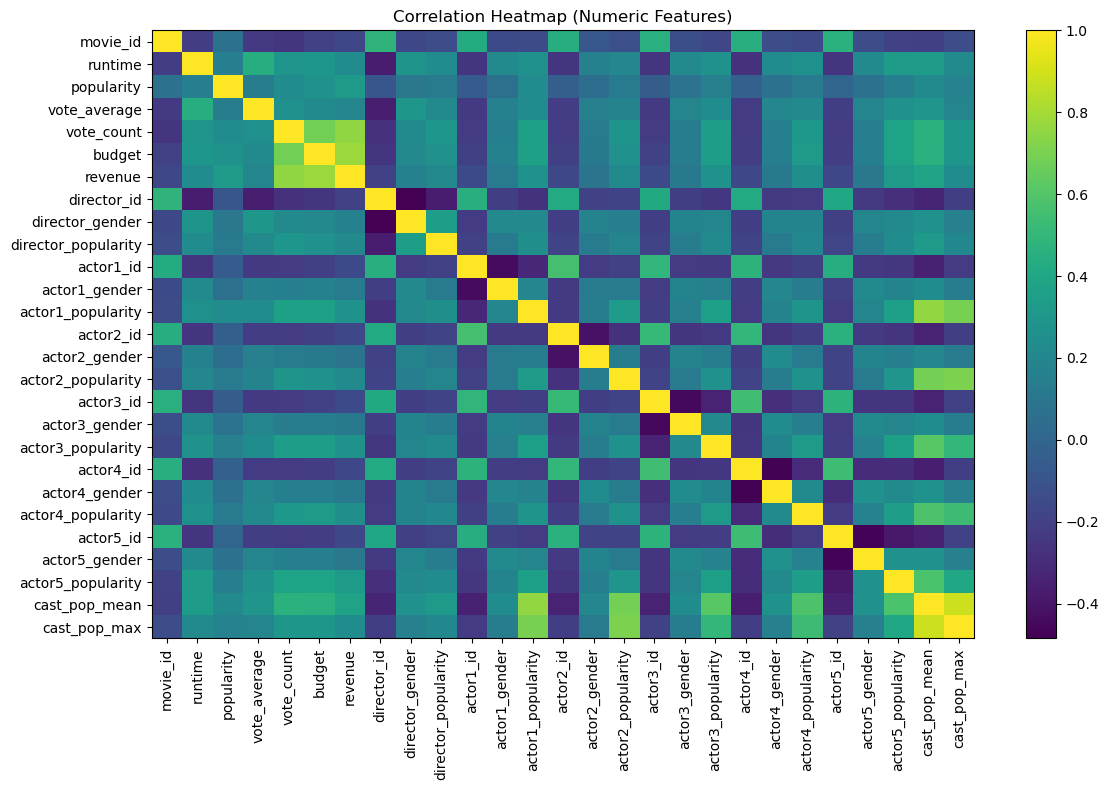

In [40]:
corr = df[num_cols].corr(numeric_only=True)

plt.figure(figsize=(12, 8))
plt.imshow(corr, aspect="auto")
plt.title("Correlation Heatmap (Numeric Features)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar()
plt.tight_layout()
plt.show()


## Comparing ##

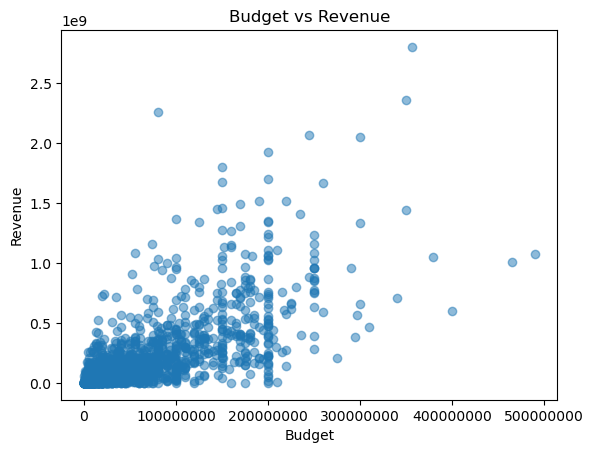

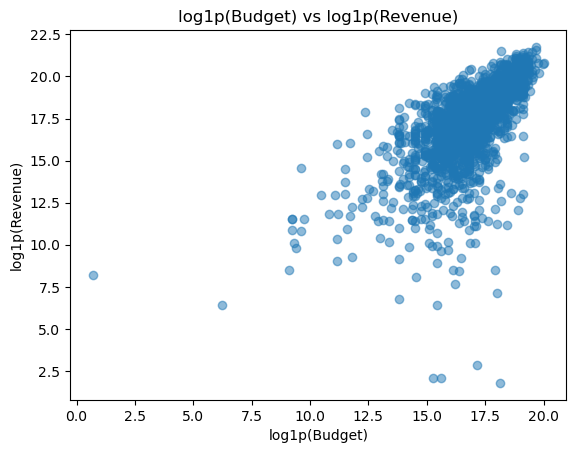

In [41]:
# Budget vs Revenue (log scale often makes this readable, drop zero in revenue and budget)
if "budget" in df_both_nonzero.columns and "revenue" in df_both_nonzero.columns:
    plt.figure()
    plt.scatter(df_both_nonzero["budget"], df_both_nonzero["revenue"], alpha=0.5)
    plt.gca().ticklabel_format(style='plain', axis='x')  # remove scientific notation
    plt.title("Budget vs Revenue")
    plt.xlabel("Budget")
    plt.ylabel("Revenue")
    plt.show()

    plt.figure()
    plt.scatter(np.log1p(df_both_nonzero["budget"]), np.log1p(df_both_nonzero["revenue"]), alpha=0.5)
    plt.title("log1p(Budget) vs log1p(Revenue)")
    plt.xlabel("log1p(Budget)")
    plt.ylabel("log1p(Revenue)")
    plt.show()

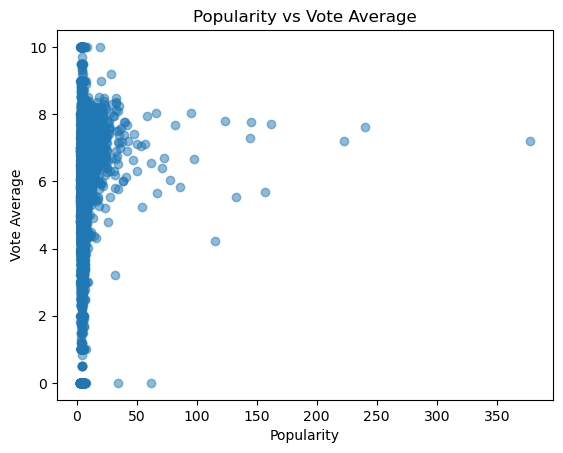

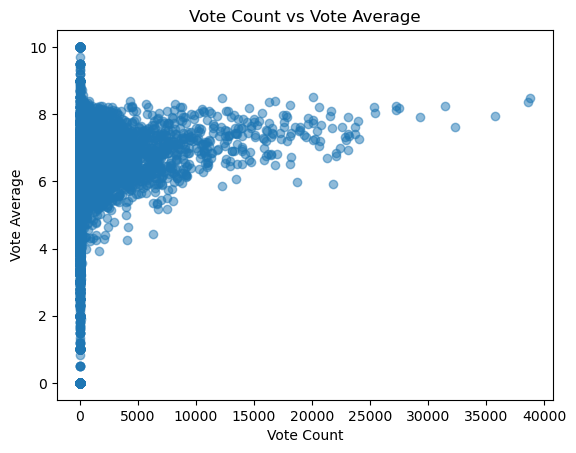

In [42]:
# Popularity vs Vote Average
if "popularity" in df.columns and "vote_average" in df.columns:
    plt.figure()
    plt.scatter(df["popularity"], df["vote_average"], alpha=0.5)
    plt.title("Popularity vs Vote Average")
    plt.xlabel("Popularity")
    plt.ylabel("Vote Average")
    plt.show()

# Vote Count vs Vote Average
if "vote_count" in df.columns and "vote_average" in df.columns:
    plt.figure()
    plt.scatter(df["vote_count"], df["vote_average"], alpha=0.5)
    plt.title("Vote Count vs Vote Average")
    plt.xlabel("Vote Count")
    plt.ylabel("Vote Average")
    plt.show()


## ROI ##

In [43]:
# ROI = (revenue - budget) / budget
# Only meaningful where budget > 0
if "budget" in df.columns and "revenue" in df.columns:
    df["roi"] = np.where(df["budget"] > 0, (df["revenue"] - df["budget"]) / df["budget"], np.nan)

    print("\nROI summary:\n", df["roi"].describe())

    # Top ROI movies (with some filters to avoid weird tiny budgets if desired)
    top_roi = (
        df.loc[df["roi"].notna()]
          .sort_values("roi", ascending=False)
          .head(15)[["title", "budget", "revenue", "roi", "vote_average", "vote_count"]]
    )
    print("\nTop 15 ROI movies:\n", top_roi)


ROI summary:
 count    2763.000000
mean        3.245541
std        69.052871
min        -1.000000
25%        -1.000000
50%         0.223352
75%         2.333333
max      3607.000000
Name: roi, dtype: float64

Top 15 ROI movies:
                                    title   budget    revenue          roi  \
7753                              Anatar        1       3608  3607.000000   
8647                 Life After Fighting   234325   59530099   253.049286   
7711                         Skinamarink    15000    2131183   141.078867   
8820                            Good Boy    70000    8781040   124.443429   
4980                           Searching  1000000   75462037    74.462037   
4374                      Satan's Slaves   120000    9033726    74.281050   
709                            Insidious  1500000  100106454    65.737636   
7041                         Terrifier 2   250000   15741780    61.967120   
382                Paranormal Activity 2  3000000  177512032    58.170677   


## Yearly comparing ##


Yearly summary (head):
    release_year  movies  avg_vote  avg_popularity    avg_budget   avg_revenue
0        2010.0     596  4.790866        4.846663  1.276909e+07  3.693081e+07
1        2011.0     600  4.736793        4.955305  1.230168e+07  3.622645e+07
2        2012.0     596  4.641248        4.822126  1.277233e+07  4.095347e+07
3        2013.0     600  4.679515        4.878217  1.242428e+07  3.880444e+07
4        2014.0     599  4.835945        5.182579  1.171387e+07  4.104015e+07


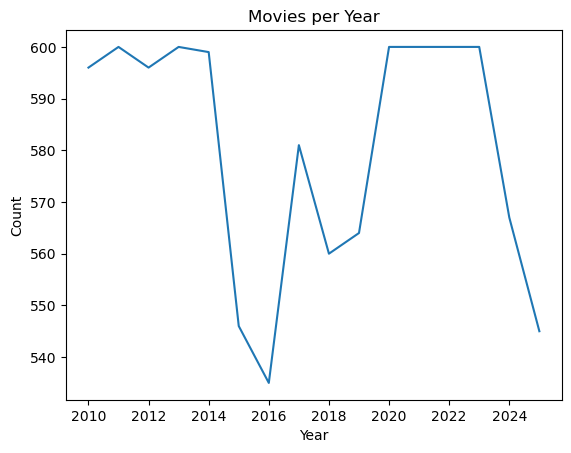

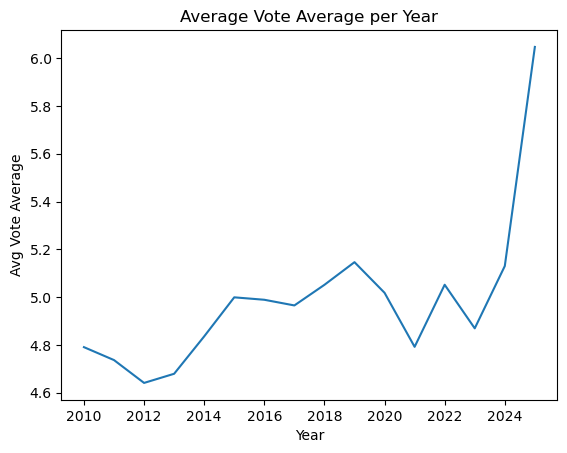

In [44]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

# 2) Create release_year
df["release_year"] = df["release_date"].dt.year

# 3) Group by year (drop missing years)
yearly = (
    df.dropna(subset=["release_year"])
      .groupby("release_year")
      .agg(
          movies=("movie_id", "count"),
          avg_vote=("vote_average", "mean"),
          avg_popularity=("popularity", "mean"),
          avg_budget=("budget", "mean"),
          avg_revenue=("revenue", "mean"),
      )
      .reset_index()
)

print("\nYearly summary (head):\n", yearly.head())

# Plot: movies per year
plt.figure()
plt.plot(yearly["release_year"], yearly["movies"])
plt.title("Movies per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Plot: average vote per year
plt.figure()
plt.plot(yearly["release_year"], yearly["avg_vote"])
plt.title("Average Vote Average per Year")
plt.xlabel("Year")
plt.ylabel("Avg Vote Average")
plt.show()

## Top director/actor ##

In [45]:
top_directors = (
    df[["director_name", "director_popularity"]]
    .dropna()
    .drop_duplicates(subset="director_name")   # remove duplicate names
    .sort_values(by="director_popularity", ascending=False)
    .head(10)
    .reset_index(drop=True)
)

print(top_directors)


        director_name  director_popularity
0         Jackie Chan              20.8778
1           Tom Hanks              15.8630
2         Ben Affleck              12.3544
3      Angelina Jolie              10.9173
4  Sylvester Stallone              10.5039
5     Andrew McCarthy               9.1435
6   Christopher Nolan               8.2813
7   Denzel Washington               8.2672
8         Aditya Dhar               8.0828
9        Pascal Cervo               8.0077


In [46]:
# Step 1: Select actor name + popularity columns
actor_cols = []

for i in range(1, 6):
    actor_cols.append((f"actor{i}_name", f"actor{i}_popularity"))

# Step 2: Combine into one DataFrame
actor_data = []

for name_col, pop_col in actor_cols:
    temp = df[[name_col, pop_col]].copy()
    temp.columns = ["actor_name", "actor_popularity"]
    actor_data.append(temp)

actors_df = pd.concat(actor_data, ignore_index=True)

# Step 3: Drop missing
actors_df = actors_df.dropna()

# Step 4: Aggregate by actor (take max popularity per actor)
actors_rank = (
    actors_df.groupby("actor_name", as_index=False)["actor_popularity"]
    .max()
    .sort_values(by="actor_popularity", ascending=False)
    .head(10)
    .reset_index(drop=True)
)

print(actors_rank)


        actor_name  actor_popularity
0     Kayden Kross          224.1500
1    Evelyn Claire          145.2190
2   Chanel Preston           88.1540
3  Akiho Yoshizawa           85.4980
4  Rosa Caracciolo           75.3990
5      Mia Malkova           42.7140
6   Sydney Sweeney           42.2737
7   Rocco Siffredi           38.1250
8     Alexis Texas           37.0830
9   Blair Williams           31.6300


In [47]:
# Step 1: Collect all actor name columns
actor_name_cols = [f"actor{i}_name" for i in range(1, 6)]

# Step 2: Stack them into one Series
all_actors = pd.concat([df[col] for col in actor_name_cols])

# Step 3: Drop missing values
all_actors = all_actors.dropna()

# Step 4: Count frequency
actor_counts = (
    all_actors.value_counts()
    .head(10)
    .reset_index()
)

# Rename columns
actor_counts.columns = ["Actor Name", "Appearance Count"]

print(actor_counts)


           Actor Name  Appearance Count
0       Mark Wahlberg                28
1        Eric Roberts                27
2   Samuel L. Jackson                26
3  Scarlett Johansson                25
4         Liam Neeson                25
5     Woody Harrelson                25
6       Ryan Reynolds                24
7         Josh Brolin                23
8           Tom Hanks                23
9     Jake Gyllenhaal                22


## Distribution of department ##

In [48]:
list_role = ["director_department","actor1_department","actor2_department",
             "actor3_department","actor4_department","actor5_department"]


===== director_department Distribution =====
   director_department  Count
0            Directing   6677
1              Writing   1048
2               Acting    902
3           Production    280
4              Editing     77
5                  NaN     72
6               Camera     67
7       Visual Effects     54
8                 Crew     44
9                  Art     26
10               Sound     24
11             Creator     11
12   Costume & Make-Up      6
13            Lighting      2


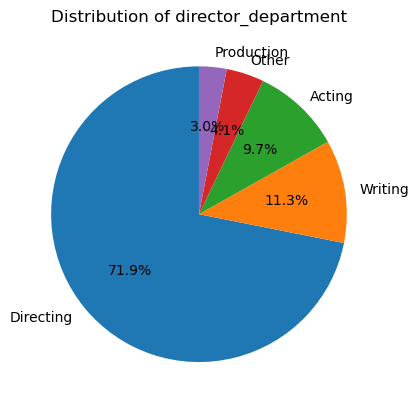


===== actor1_department Distribution =====
    actor1_department  Count
0              Acting   8818
1                 NaN    222
2           Directing    133
3             Writing     54
4          Production     24
5               Sound     11
6                Crew     11
7                 Art      6
8      Visual Effects      3
9              Camera      3
10            Editing      3
11  Costume & Make-Up      2


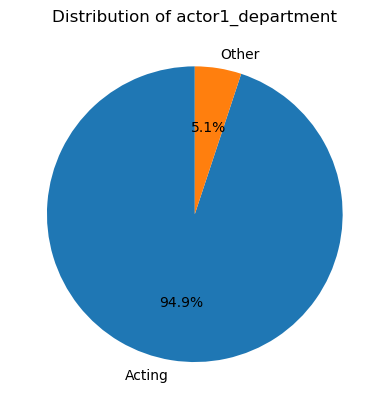


===== actor2_department Distribution =====
    actor2_department  Count
0              Acting   8724
1                 NaN    383
2           Directing     87
3             Writing     41
4          Production     17
5               Sound     13
6                Crew      9
7                 Art      5
8   Costume & Make-Up      4
9      Visual Effects      3
10            Editing      3
11             Camera      1


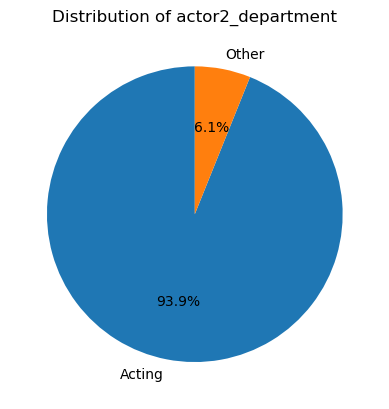


===== actor3_department Distribution =====
    actor3_department  Count
0              Acting   8453
1                 NaN    674
2           Directing     67
3             Writing     33
4          Production     25
5               Sound     12
6                Crew      7
7                 Art      5
8   Costume & Make-Up      5
9              Camera      4
10     Visual Effects      2
11            Editing      2
12            Creator      1


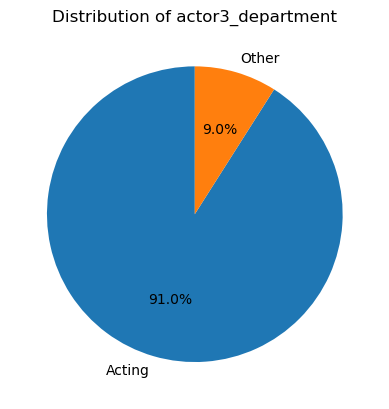


===== actor4_department Distribution =====
    actor4_department  Count
0              Acting   8071
1                 NaN   1032
2           Directing     80
3          Production     33
4             Writing     32
5               Sound     12
6                Crew     12
7                 Art      5
8   Costume & Make-Up      4
9              Camera      3
10     Visual Effects      2
11            Creator      2
12           Lighting      1
13            Editing      1


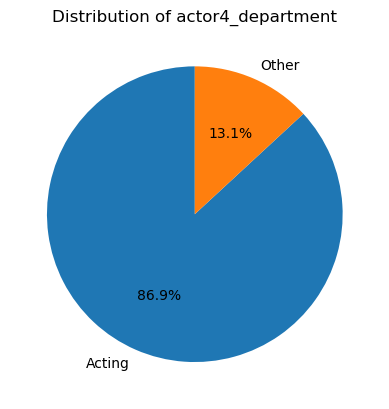


===== actor5_department Distribution =====
    actor5_department  Count
0              Acting   7642
1                 NaN   1477
2           Directing     79
3          Production     29
4             Writing     25
5                Crew     13
6               Sound     11
7                 Art      5
8              Camera      3
9             Editing      3
10  Costume & Make-Up      2
11     Visual Effects      1


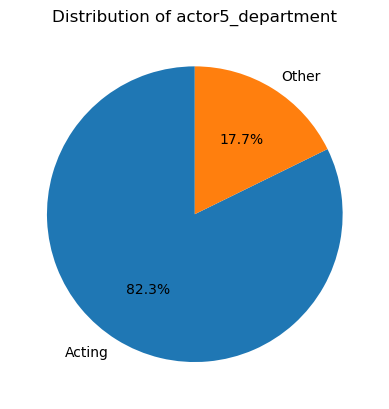

In [49]:
for col in list_role:
    if col not in df.columns:
        continue

    print(f"\n===== {col} Distribution =====")

    # ---------------------------
    # 1️⃣ Original Table
    # ---------------------------
    counts_original = df[col].value_counts(dropna=False).reset_index()
    counts_original.columns = [col, "Count"]

    print(counts_original)

    # ---------------------------
    # 2️⃣ Cleaned for Pie Chart
    # ---------------------------
    if col == "director_department":
        keep_values = ["Directing", "Writing", "Acting", "Production"]
        cleaned = df[col].where(df[col].isin(keep_values), "Other")
    else:
        cleaned = df[col].where(df[col] == "Acting", "Other")

    counts_clean = cleaned.value_counts()

    # ---------------------------
    # 3️⃣ Pie Chart
    # ---------------------------
    plt.figure()
    plt.pie(
        counts_clean,
        labels=counts_clean.index,
        autopct="%1.1f%%",
        startangle=90
    )
    plt.title(f"Distribution of {col}")
    plt.show()